In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

### Gaussian filter 1D

$$
y_i = \sum_{j=-k}^{k} G(j) \cdot x_{i-j}
$$
With : 
$$
G(j) = \frac{1}{Z} \exp\left( -\frac{j^2}{2\sigma^2} \right), \quad Z = \sum_{l=-k}^{k} \exp\left( -\frac{l^2}{2\sigma^2} \right)
$$


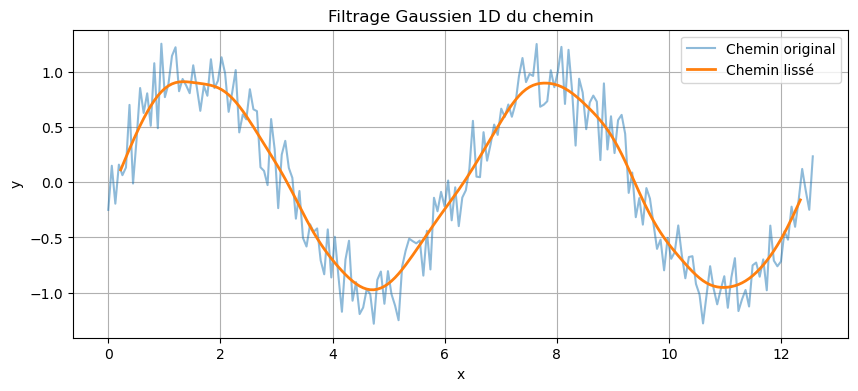

In [18]:

# Crée un chemin avec des oscillations
t = np.linspace(0, 4 * np.pi, 200)
x = t
y = np.sin(t) + 0.2 * np.random.randn(200)  # sinusoïde bruitée
path = np.stack([x, y], axis=1)

# Applique le filtre gaussien
smoothed_x = gaussian_filter1d(path[:, 0], sigma=5)
smoothed_y = gaussian_filter1d(path[:, 1], sigma=5)
smoothed_path = np.stack([smoothed_x, smoothed_y], axis=1)

# Affiche avant/après
plt.figure(figsize=(10, 4))
plt.plot(path[:, 0], path[:, 1], label="Chemin original", alpha=0.5)
plt.plot(smoothed_path[:, 0], smoothed_path[:, 1], label="Chemin lissé", linewidth=2)
plt.legend()
plt.title("Filtrage Gaussien 1D du chemin")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## SDF and velocity

In [16]:
from data_loader import load_sdf_from_csv,vel_read
import matplotlib.colors as mcolors
import numpy as np
from scipy.interpolate import RegularGridInterpolator

## 3D

In [19]:
def generate_helix(num_points=500, radius=1.0, pitch=0.1, turns=3,clockwise = True):
    t = np.linspace(0, 2 * np.pi * turns, num_points)
    if clockwise : 
        x = radius * np.sin(t) 
        z = radius * np.cos(t)
    else: 
        x = radius * np.cos(t) 
        z = radius * np.sin(t)
    y = pitch * t/(2*np.pi)
    curve = np.stack((x, y, z), axis=1)
    return curve

Distance between points : 1.0


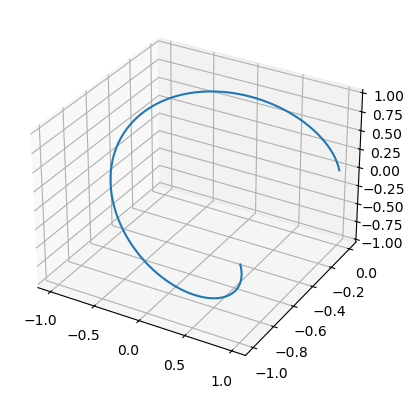

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

curve = generate_helix(2000, 1, -1,1,False)
print("Distance between points :", np.linalg.norm(curve[-1]-curve[0]))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*curve.T)
plt.show()

Distance between points : 10.0


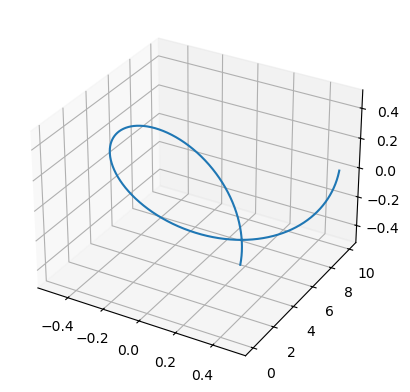

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

curve = generate_helix(2000, 1/2, 10,1,False)
print("Distance between points :", np.linalg.norm(curve[-1]-curve[0]))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*curve.T)
plt.show()

In [22]:
def draw_circle(center,radius):
    t = np.linspace(0,2*np.pi,200)
    print(center)
    x = center[0] * np.ones_like(t) + radius * np.cos(t)
    y = center[1] * np.ones_like(t) + radius * np.sin(t)
    z = np.ones_like(x) * center[-1]
    circle = np.stack((x,y,z),axis=1)
    return x,y,z


In [23]:
import numpy as np
import plotly.graph_objects as go


fig = go.Figure()

path = generate_helix(2000, 2 ,2.5, 1,True)
x = path[:,0]
y = path[:,1]
z = path[:,2]
# Création d’un plot 3D interactif
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='lines',
    line=dict(color='blue', width=4)
))


# path = generate_helix(2000, 2, 1,1,False)
# x = path[:,0]
# y = path[:,1]
# z = path[:,2]
# # Création d’un plot 3D interactif
# fig.add_trace(go.Scatter3d(
#     x=x, y=y, z=z,
#     mode='lines',
#     line=dict(color='red', width=4)
# ))
# path = generate_helix(2000, 1/8, 1,1,False)
# x = path[:,0]
# y = path[:,1]
# z = path[:,2]
# # Création d’un plot 3D interactif
# fig.add_trace(go.Scatter3d(
#     x=x, y=y, z=z,
#     mode='lines',
#     line=dict(color='green', width=4)
# ))

# start = np.array([-1/2, 0, 0])
# direction = np.array([0, 1, 0])  # direction [1,0,0]
# fig.add_trace(go.Cone(
#     x=[start[0]],
#     y=[start[1]],
#     z=[start[2]],
#     u=[direction[0]],
#     v=[direction[1]],
#     w=[direction[2]],
#     sizemode="absolute",
#     sizeref=0.15,
#     anchor="tail",
#     colorscale=[[0, 'red'], [1, 'red']],
#     showscale=False,
#     name="Direction"
# ))

# a = 0.25
# cir = 2
# center = np.array([0, 0.6, -0.5])
# fig.add_trace(
#     go.Scatter3d(
#         x=[center[0]],
#         y=[center[1]],
#         z=[center[2]],
#         mode="markers",
#         marker=dict(size=3, color='black'),
#         name=f"Center",
#     )
# )

# x,y,z =draw_circle(center,a)
# fig.add_trace(go.Scatter3d(
#     x=x, y=y, z=z,
#     mode='lines',
#     line=dict(color='black', width=4),
#     name='vortex radius'
# ))

# Mise en forme
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),
    title="Hélicoïdale 3D interactive"
)

# Enregistrer dans un fichier HTML
fig.write_html("helix_plot_bis.html")


In [24]:
import numpy as np

# Vecteurs d'entrée
x = np.array([1, 2, 3])
y = np.array([4, 5,6,7])

# Style matriciel ('ij')
Xi, Yi = np.meshgrid(x, y, indexing='ij')
print("Indexing 'ij':")
print("Xi shape:", Xi.shape)  
print("Yi shape:", Yi.shape)  
print("Xi:\n", Xi[0,1])
print("Yi:\n", Yi[0,1])

# Style cartésien ('xy')
Xx, Yx = np.meshgrid(x, y, indexing='xy')
print("\nIndexing 'xy':")
print("Xx shape:", Xx.shape) 
print("Yx shape:", Yx.shape) 
print("Xx:\n", Xx[0,1])
print("Yx:\n", Yx[0,1])

Indexing 'ij':
Xi shape: (3, 4)
Yi shape: (3, 4)
Xi:
 1
Yi:
 5

Indexing 'xy':
Xx shape: (4, 3)
Yx shape: (4, 3)
Xx:
 2
Yx:
 4
